In [3]:
#Oringinal code did not save so this is as close as I could get to my original code
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib.cm import ScalarMappable
import astropy
import astropy.units as u
import pandas as pd

In [4]:
#data_table_1 = open('C:\\Users\\callo\\OneDrive\\Documents\\SURP\\stac2706_supplemental_files\\tab1.csv','r')
#data = []
#for i in data_table_1:
#    data.append(i.split(','))


In [5]:
#This is Pleiades
table1 = pd.read_csv('C:\\Users\\callo\\OneDrive\\Documents\\SURP\\stac2706_supplemental_files\\tab1.csv')

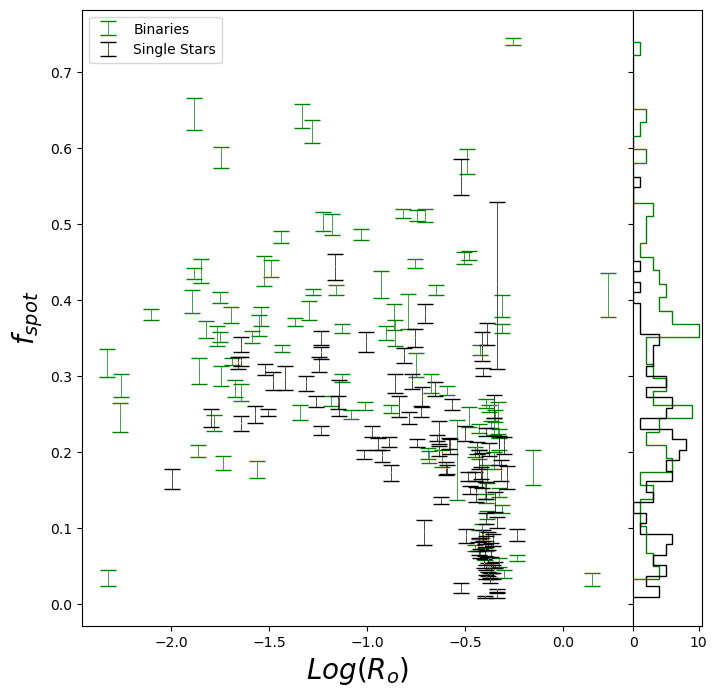

In [6]:
Ro  = table1['Ro']
fspot = table1['fspot']
e_fspot = table1['e_fspot']

filt = (table1['Bin_Flag']==True) & (table1['fspot'] < 0.862)
Binary = table1[filt]
filt1 = table1['Bin_Flag']!=True
Single = table1[filt1]


fig, (ax, ax2) = plt.subplots(1, 2, figsize=[8,8], width_ratios = [8,1], sharey = True)
fig.subplots_adjust(wspace=0)

ax.errorbar(np.log10(Binary['Ro']), Binary['fspot'], Binary['e_fspot'], fmt = ',',
            capsize = 6, ecolor = 'g', label = 'Binaries', elinewidth = 0.5)
ax.errorbar(np.log10(Single['Ro']), Single['fspot'], Single['e_fspot'], fmt = ',',
            capsize = 6, ecolor = 'black', label = 'Single Stars', elinewidth = 0.5)
ax2.hist(Binary['fspot'], bins = 40, histtype = 'step', orientation = u'horizontal', color = 'g')
ax2.hist(Single['fspot'], bins = 40, histtype = 'step', orientation = u'horizontal', color = 'black')
ax.legend(loc = 'upper left')
ax.set_ylabel(r'$f_{spot}$', size = 20)
ax.set_xlabel(r'$Log(R_{o})$', size = 20)
plt.savefig('Rossby_Diagram.png')
plt.show()

In [7]:
#This is M67 data
table3 = pd.read_csv('C:\\Users\\callo\\OneDrive\\Documents\\SURP\\stac2706_supplemental_files\\tab3.csv')

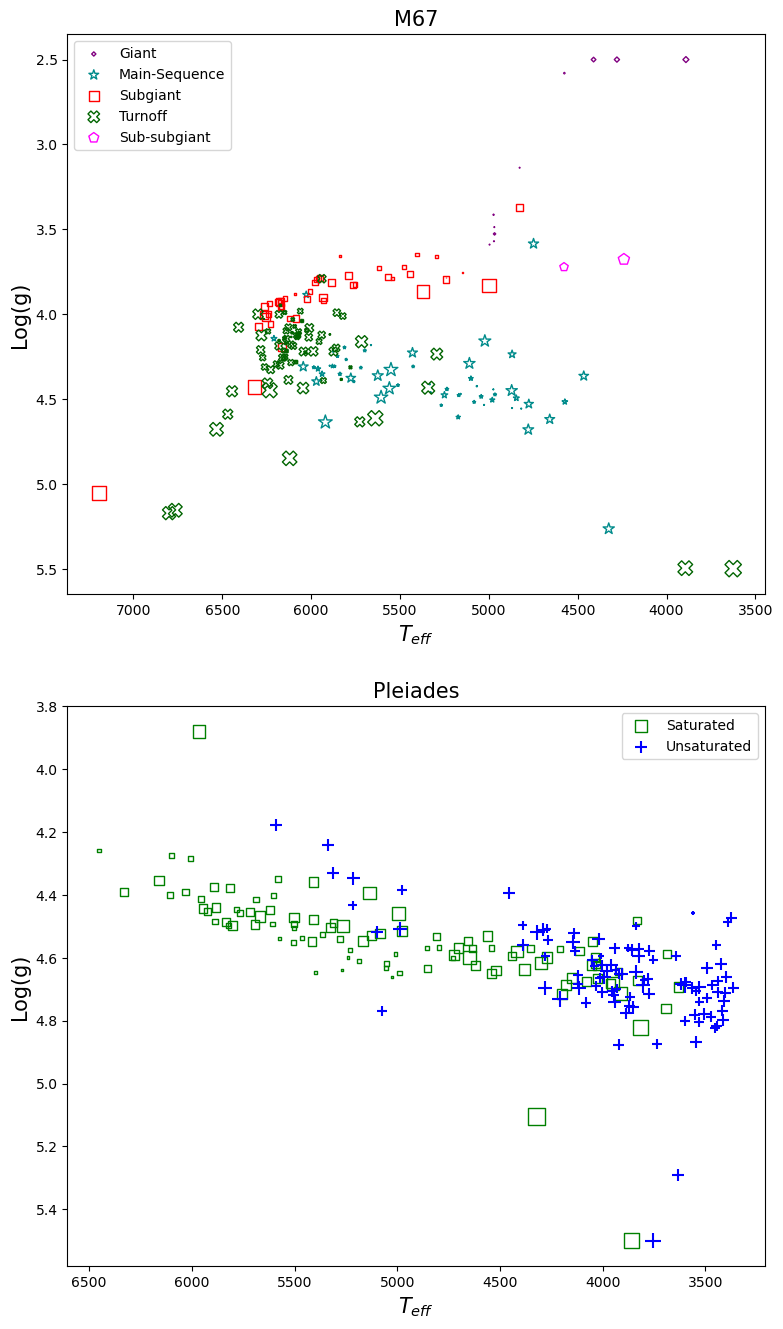

In [8]:
#M67
logg1 = table3['logg']
Teff1 = table3['Teff']

#eTeff1 = table3['e_Teff']
#elogg1 = table3['e_logg']

#Pleiades
logg2 = table1['logg']
Teff2 = table1['Teff']
#eTeff2 = table1['e_Teff']
#elogg2 = table1['e_logg']

#Splitting a scatter plot by marking different points of excluded data

filt1 = table3['Evstate']=='Giant'
Giant = table3[filt1]

filt2 = table3['Evstate']=='MS'
MS = table3[filt2]

filt3 = table3['Evstate']=='Subgiant'
SGiant = table3[filt3]

filt4 = table3['Evstate']=='Turnoff'
TO = table3[filt4]

filt5 = table3['Evstate']=='Sub-subgiant'
SsGiant = table3[filt5]

#Saturated
filt6 = (np.log10(Ro) > -0.677)
logRo1 = table1[filt6]

#Unsaturated
filt7 = (np.log10(Ro) <= -0.677)
logRo2 = table1[filt7]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[9,16])

ax1.scatter(Giant['Teff'], Giant['logg'], s = Giant['fspot'] * 200, label = 'Giant', marker = 'D', edgecolors = 'purple', facecolors = 'none')
ax1.scatter(MS['Teff'], MS['logg'], s = MS['fspot'] * 200, label = 'Main-Sequence', marker = '*', edgecolors = 'darkcyan', facecolors = 'none')
ax1.scatter(SGiant['Teff'], SGiant['logg'], s = SGiant['fspot'] * 200, label = 'Subgiant', marker = 's', edgecolors = 'red', facecolors = 'none')
ax1.scatter(TO['Teff'], TO['logg'], s = TO['fspot'] * 200, label = 'Turnoff', marker = 'X', edgecolors = 'darkgreen', facecolors = 'none')
ax1.scatter(SsGiant['Teff'], SsGiant['logg'], s = SsGiant['fspot'] * 200, label = 'Sub-subgiant', marker = 'p', edgecolors = 'fuchsia', facecolors = 'none')

ax1.set_title('M67', size = 15)

ax1.set_xlabel(r'$T_{eff}$', size = 15)
ax1.set_ylabel('Log(g)', size = 15)

ax1.legend()

ax2.scatter(logRo1['Teff'], logRo1['logg'], s = logRo1['fspot'] * 200, label = 'Saturated', marker = 's', edgecolors = 'green', facecolors = 'none')
ax2.scatter(logRo2['Teff'], logRo2['logg'], s = logRo2['fspot'] * 200, label = 'Unsaturated', marker = '+', c = 'blue')

ax2.set_xlabel(r'$T_{eff}$', size = 15)
ax2.set_ylabel('Log(g)', size = 15)

ax2.legend()
ax2.set_title('Pleiades', size = 15)

ax1.invert_xaxis()
ax2.invert_xaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()

plt.savefig('HR_spinoff_of_M67_and_Pleiades.png')
plt.show()

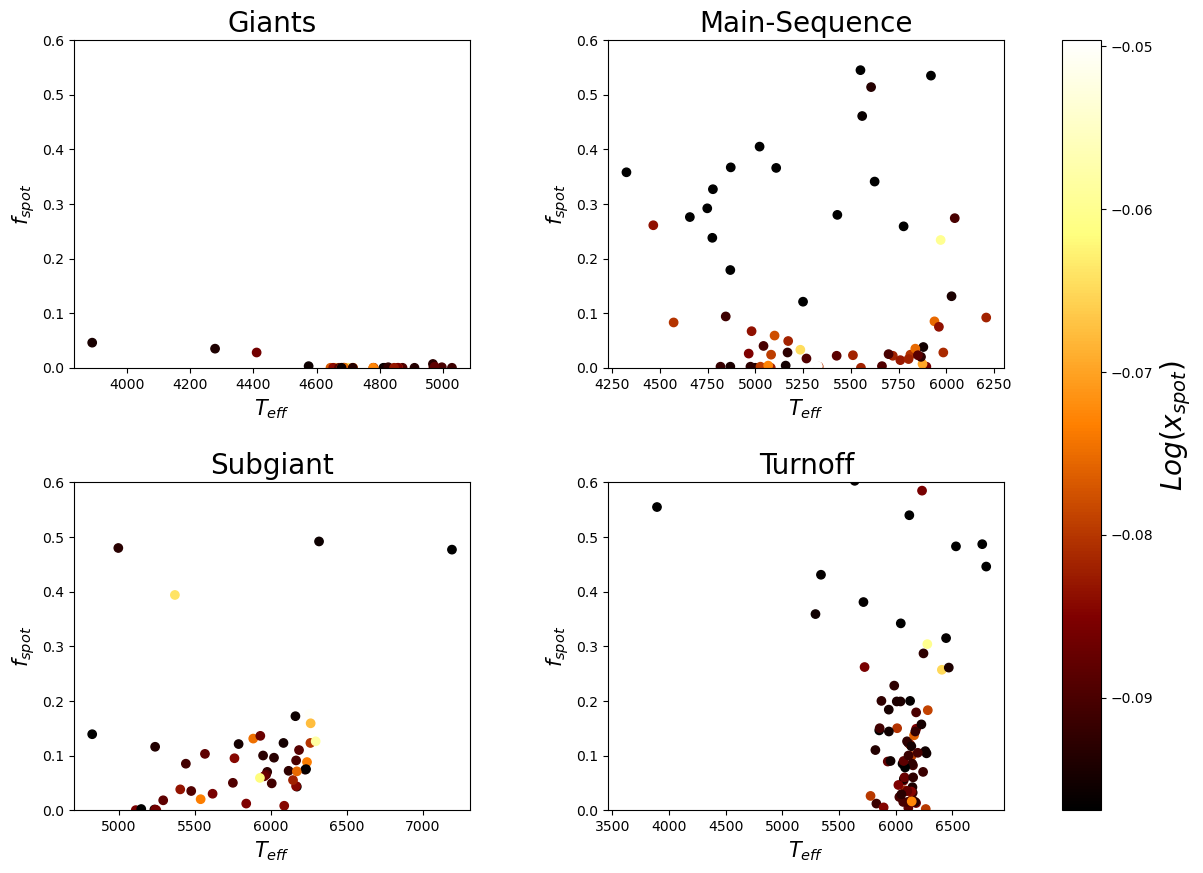

In [9]:
#Plotting fspot over Teff for M67 evolutionary states to see how different all the states are and if 
#there is anything I notice
Gxspot = np.log10(Giant['xspot'])
MSxspot = np.log10(MS['xspot'])
SGxspot = np.log10(SGiant['xspot'])
TOxspot = np.log10(TO['xspot'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = [15, 10])
fig.subplots_adjust(wspace=0.35)
fig.subplots_adjust(hspace=0.35)

#xspot_colordataG = Giant['xspot']
#xspot_colordataMS = MS['xspot']
#xspot_colordataSG = SGiant['xspot']
#xspot_colordataTO = TO['xspot']

xspot_colordataG = Gxspot
xspot_colordataMS = MSxspot
xspot_colordataSG = SGxspot
xspot_colordataTO = TOxspot

sc = ax1.scatter(Giant['Teff'], Giant['fspot'], c = xspot_colordataG, cmap = 'afmhot')
#ax1.errorbar(Giant['Teff'], Giant['fspot'], Giant['e_fspot'], Giant['e_Teff'], fmt = ',', capsize = 6, elinewidth = 0.5, ecolor = 'black')
ax1.set_title('Giants', size = 20)

sc = ax2.scatter(MS['Teff'], MS['fspot'], c = xspot_colordataMS, cmap = 'afmhot')
#ax2.errorbar(MS['Teff'], MS['fspot'], MS['e_fspot'], MS['e_Teff'], fmt = ',', capsize = 6, elinewidth = 0.5)
ax2.set_title('Main-Sequence', size = 20)

sc = ax3.scatter(SGiant['Teff'], SGiant['fspot'], c = xspot_colordataSG, cmap = 'afmhot')
#ax3.errorbar(SGiant['Teff'], SGiant['fspot'], SGiant['e_fspot'], SGiant['e_Teff'], fmt = ',', capsize = 6, elinewidth = 0.5)
ax3.set_title('Subgiant', size = 20)

sc = ax4.scatter(TO['Teff'], TO['fspot'], c = xspot_colordataTO, cmap = 'afmhot')
#ax4.errorbar(TO['Teff'], TO['fspot'], TO['e_fspot'], TO['e_Teff'], fmt = ',', capsize = 6, elinewidth = 0.5)
ax4.set_title('Turnoff', size = 20)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel(r'$T_{eff}$', size = 15)
    ax.set_ylabel(r'$f_{spot}$', size = 15)
    ax.set_ylim(0, 0.6)

cbar = fig.colorbar(sc, ax = (ax1, ax2, ax3, ax4))
cbar.set_label(r'$Log(x_{spot})$', size=20)

plt.savefig('SpotfillFracvsTempCont.png')
plt.show()

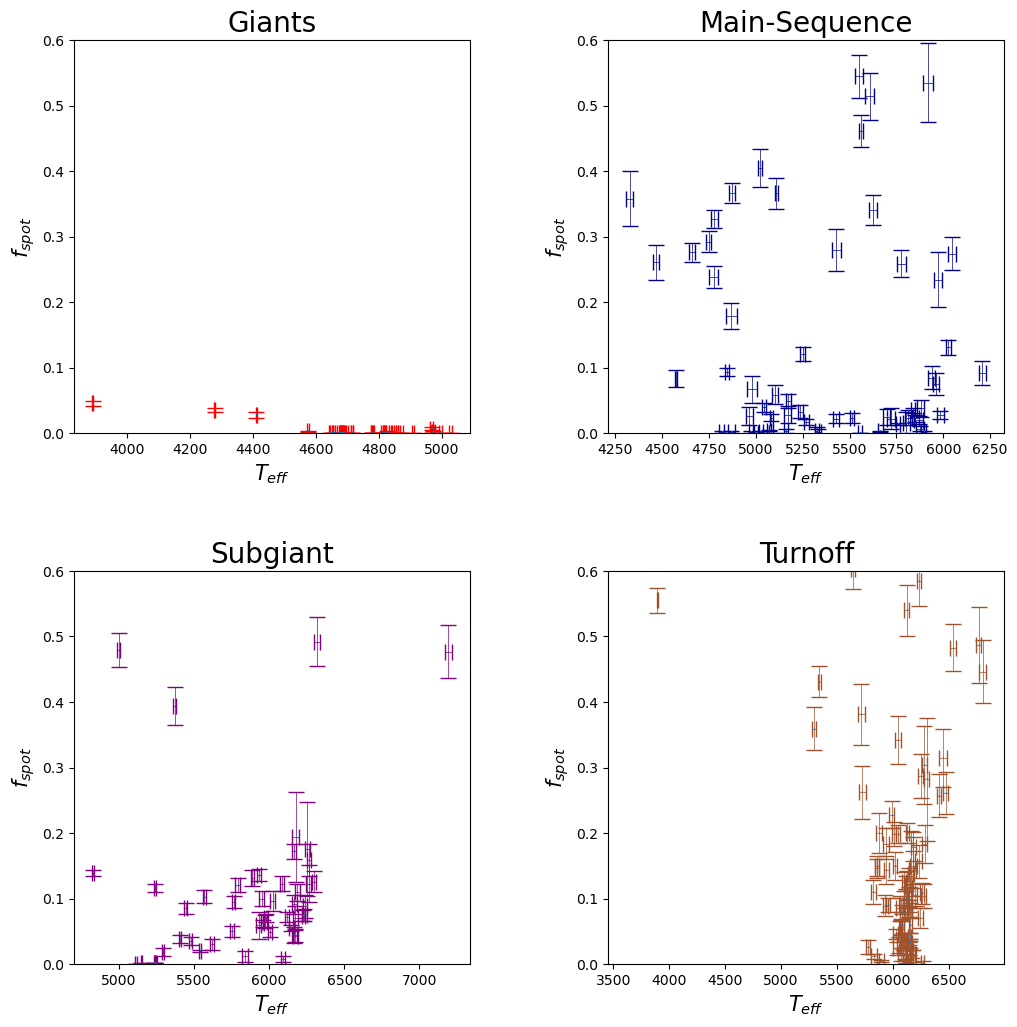

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = [12, 12])
fig.subplots_adjust(wspace=0.35)
fig.subplots_adjust(hspace=0.35)

#xspot_colordataG = Giant['xspot']
#xspot_colordataMS = MS['xspot']
#xspot_colordataSG = SGiant['xspot']
#xspot_colordataTO = TO['xspot']

xspot_colordataG = Gxspot
xspot_colordataMS = MSxspot
xspot_colordataSG = SGxspot
xspot_colordataTO = TOxspot

#sc = ax1.scatter(Giant['Teff'], Giant['fspot'], c = xspot_colordataG, cmap = 'afmhot')
ax1.errorbar(Giant['Teff'], Giant['fspot'], Giant['e_fspot'], Giant['e_Teff'], fmt = ',', capsize = 6, elinewidth = 0.5, ecolor = 'Red')
ax1.set_title('Giants', size = 20)

#sc = ax2.scatter(MS['Teff'], MS['fspot'], c = xspot_colordataMS, cmap = 'afmhot')
ax2.errorbar(MS['Teff'], MS['fspot'], MS['e_fspot'], MS['e_Teff'], fmt = ',', capsize = 6, elinewidth = 0.5, ecolor = 'darkblue')
ax2.set_title('Main-Sequence', size = 20)

#sc = ax3.scatter(SGiant['Teff'], SGiant['fspot'], c = xspot_colordataSG, cmap = 'afmhot')
ax3.errorbar(SGiant['Teff'], SGiant['fspot'], SGiant['e_fspot'], SGiant['e_Teff'], fmt = ',', capsize = 6, elinewidth = 0.5, ecolor = 'purple')
ax3.set_title('Subgiant', size = 20)

#sc = ax4.scatter(TO['Teff'], TO['fspot'], c = xspot_colordataTO, cmap = 'afmhot')
ax4.errorbar(TO['Teff'], TO['fspot'], TO['e_fspot'], TO['e_Teff'], fmt = ',', capsize = 6, elinewidth = 0.5, ecolor = 'sienna')
ax4.set_title('Turnoff', size = 20)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel(r'$T_{eff}$', size = 15)
    ax.set_ylabel(r'$f_{spot}$', size = 15)
    ax.set_ylim(0, 0.6)

#cbar = fig.colorbar(sc, ax = (ax1, ax2, ax3, ax4))
#cbar.set_label(r'$Log(x_{spot})$', size=20)

plt.savefig('Spotfillfrac.png')
plt.show()

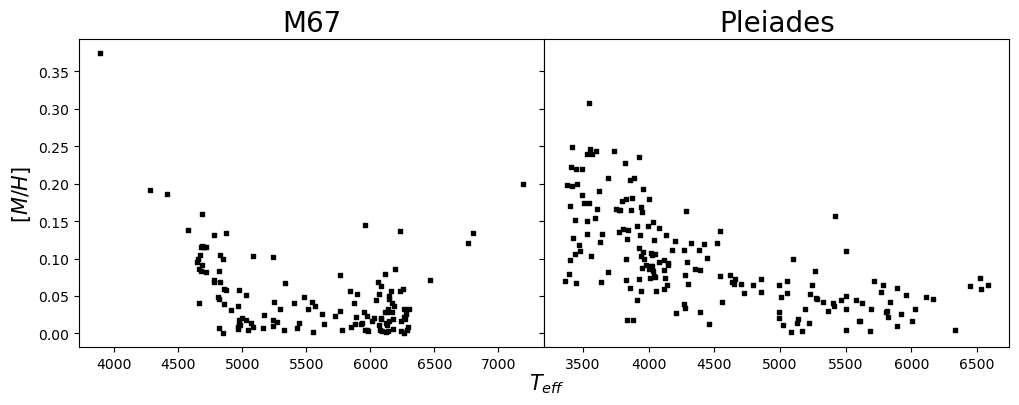

In [11]:
#comparing metallicity to temperature of all stars
PMH = table1['[M/H]']
MMH = table3['[M/H]']

#Pleiades
#logg2 = table1['logg']
#Teff2 = table1['Teff']

#M67
#logg1 = table3['logg']
#Teff1 = table3['Teff']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [12, 4], sharey = True)
fig.subplots_adjust(wspace=0)

ax1.scatter(Teff1, MMH, s = 10, marker = 's', edgecolors = 'black', facecolors = 'black')
ax1.set_title('M67', size = 20)

ax2.scatter(Teff2, PMH, s = 10, marker = 's', edgecolors = 'black', facecolors = 'Black')
ax2.set_title('Pleiades', size = 20)

#for ax in [ax1, ax2]:
    #ax.set_xlabel(r'$T_{eff}$', size = 15)
ax1.set_ylabel(r'$[M/H]$', size = 15)
fig.text(0.515, 0.005, r'$T_{eff}$', ha='center', size=15)

plt.savefig('Metallicity.png')
plt.show()

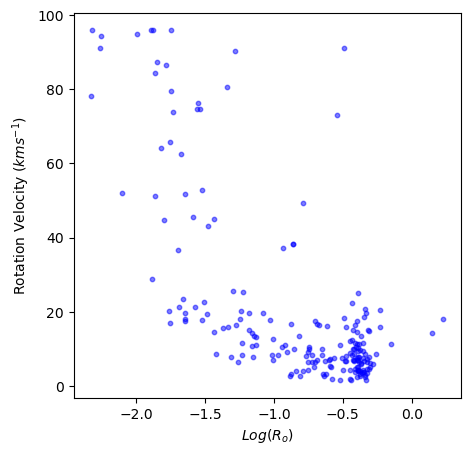

In [43]:
#Rotational velocity (kms^-1) realtion to the Rossby numbers
vsini = table1['vsini'] #Pleiades
Ro = table1['Ro']
#e_vsini = table1['e_vsini']

plt.figure(figsize = [5, 5])

#plt.scatter(Ro, vsini, s = 10, c = 'b', marker = 'o')
plt.scatter(np.log10(Ro), vsini, s = 10, c = 'b', marker = 'o', alpha = .5)
#plt.errorbar(Ro, vsini, e_vsini, fmt = ',', capsize = 6, ecolor = 'g', label = 'Binaries', elinewidth = 0.5)

plt.xlabel(r'$Log(R_{o})$')
plt.ylabel(r'Rotation Velocity ($kms^{-1}$)')

plt.savefig('RvelvsRossby.png')
plt.show()

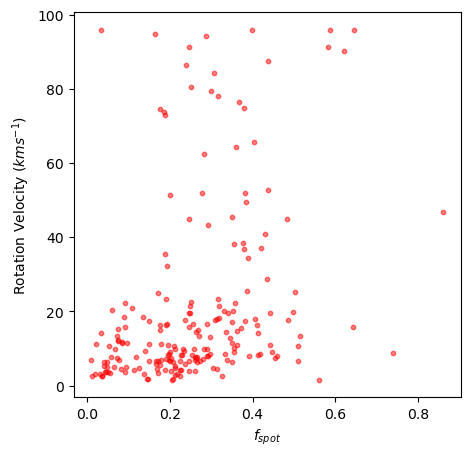

In [45]:
#Rotational velocity (kms^-1) realtion to the Rossby numbers
vsini = table1['vsini'] #Pleiades
fspot = table1['fspot']
#e_vsini = table1['e_vsini']

plt.figure(figsize = [5, 5])

plt.scatter(fspot, vsini, s = 10, c = 'r', marker = 'o', alpha = .5)

plt.xlabel(r'$f_{spot}$')
plt.ylabel(r'Rotation Velocity ($kms^{-1}$)')


plt.savefig('Rvelvsfspot.png')
plt.show()